# Matrix Inverse

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## Definition
- Ma trận nghịch đảo A là ma trận khác $ A^{-1} $  mà khi nhân nó với A tạo ra ma trận đơn vị (identity matrix) hay $ A^{-1} A = I $
- Dùng để biến đổi tuyến tính matrix thành identity matrix. Nó được dùng để tính nghiệm của một phương trình tuyến tính : $$ Ax = b \\ x = A^{-1}b $$ 

## Types of Inverses and Conditions for Invertibility 
- Có 3 loại ma trận nghịch đảo có điều kiện nghịch đảo khác nhau. 
1. Full inverse: 
    - là ma trận có nghĩa $ A^{-1}A = AA^{-1} = I$
    - 2 điều kiện của ma trận này là: vuông và full-rank
2. One-sided inverse : 
    - Ma trận không vuông cũng có thể là chuyển thành ma trận nghịch đảo thỏa mãn công thức trên, tuy nhiên chúng chỉ thỏa mãn 1 chiều. Ma trận cao T có ma trận nghịch đảo trái L ($ LT = I $), Ma trận rộng có ma trận nghịch đảo phải R ($ WR = I $) - ưu tiên tạo thành ma trận có chiều ít hơn. 
    - Điều kiện để ma trận không vuông tồn tại nghịch đảo là rank đạt giá trị max (rank = số cols or số rows)
3. Psuedoinverse : 
    - Mọi ma trận đều có psuedoinverse, bất kể shape hoặc rank của nó. Tuy nhiên với reduced - rank matrix psuedoinverse chỉ gần những không bằng với identity matrix

## Computing the Inverse 
- Tính toán ma trận nghịch đảo không giống với việc tính toán các số vô hướng thông thường

### Inverse a 2 x 2 matrix 
- Nghịch đảo của một ma trận 2 x 2 A như sau : $ A = \begin{vmatrix} a & b \\ c & d \end{vmatrix} $ là một ma trận được tính như sau : $ A^{-1} = \frac 1 {ad - bc} \begin{vmatrix} d & -b \\ -c & a \end{vmatrix} $ 

In [2]:
A = np.array([
    [1, 4], 
    [2, 7]
])

Ainv = np.linalg.inv(A)
I = A @ Ainv


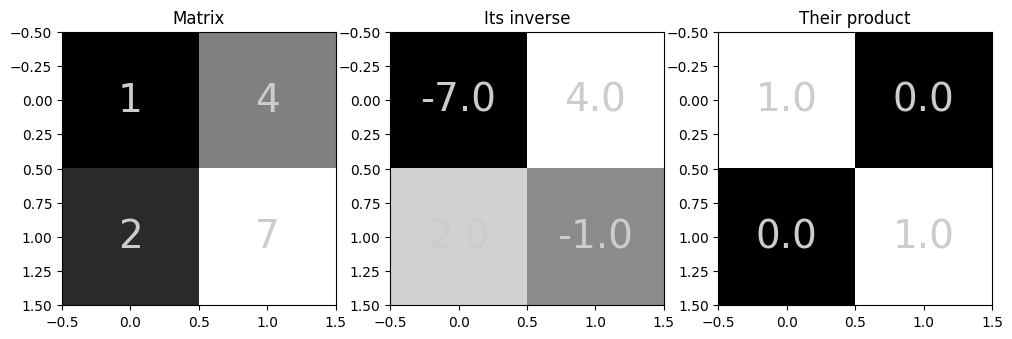

In [3]:
# draw matrix 

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 8))

# original matrix
ax[0].imshow(A, cmap = 'gray')
ax[0].set_title('Matrix')

for (j, i), num in np.ndenumerate(A) : 
    ax[0].text(i, j, num, color = [.8, .8, .8], ha = 'center', va = 'center', fontsize = 28)

# its inverse 
ax[1].imshow(Ainv, cmap = 'gray')
ax[1].set_title('Its inverse')

for (j, i), num in np.ndenumerate(Ainv) : 
    ax[1].text(i, j, num, color = [.8, .8, .8], ha = 'center', va = 'center', fontsize = 28)

# Their product 
ax[2].imshow(I, cmap = 'gray')
ax[2].set_title('Their product')
for (j, i), num in np.ndenumerate(I) : 
    ax[2].text(i, j, num, color = [.8, .8, .8], ha = 'center', va = 'center', fontsize = 28)

plt.show()

- Ma trận nghịch đảo có thể không tính được do determinant bằng 0. 

In [4]:
A = np.array([
    [1, 4], 
    [2, 8]
    ])
# determinant = 0 
# Ainv = np.linalg.inv(A)
# I = A @ Ainv

- Ma trận đường chéo có phép nhân ma trận lần lượt theo giá trị của phần tử đường chéo. Do đó ma trận nghịch đảo của ma trận đường chéo là nghịch đảo của từng phần tử của nó 

In [5]:
A = np.diag([8, 9, 2, 3])
Ainv = np.linalg.inv(A)
Ainv 

array([[0.125     , 0.        , 0.        , 0.        ],
       [0.        , 0.11111111, 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.        , 0.33333333]])

### Inverse any square full-rank matrix 
- Khi một ma trận thỏa mãn điều kiện có inverse (full-rank và square) khi đó ta có thuật toán để tìm kiếm ma trận nghịch đảo của ma trận đã cho trước. 
- Thuật toán : 
1. The minors matrix : là ma trận đóng gói determinants của ma trận con được tạo bởi kết hợp ith row và jth columns
![Local Image](Img/Figure8_2.png)

2. Grid matrix : is a checkerboard of alternating +1s and -1s . It's computed using the following formula : 
$$ g_{i, j} = -1 ^{i + j} $$
3. Cofactors matrix : is the Hadamard multiplication of the minor with the grid matrix 
4. Adjugate matrix : is the transpose of cofactors matrix, scalar multiplied by the inverse of the determinant of the original matrix. 

In [6]:
A = np.random.randn(4, 4) @ np.random.randn(4, 4)
rank_of_A = np.linalg.matrix_rank(A)
rank_of_A

4

In [7]:
minor_matrix = np.zeros(A.shape)
grid_matrix = np.zeros(A.shape) 

for i in range(A.shape[0]) : 
    for j in range(A.shape[1]) : 
        grid_matrix[i, j] = (-1) ** (i + j) 

        sub_matrix = np.delete(np.delete(A, i, axis = 0), j, axis = 1)
        minor_matrix[i, j] = np.linalg.det(sub_matrix)

cofactor_matrix = minor_matrix * grid_matrix
adjugate_matrix = cofactor_matrix.T

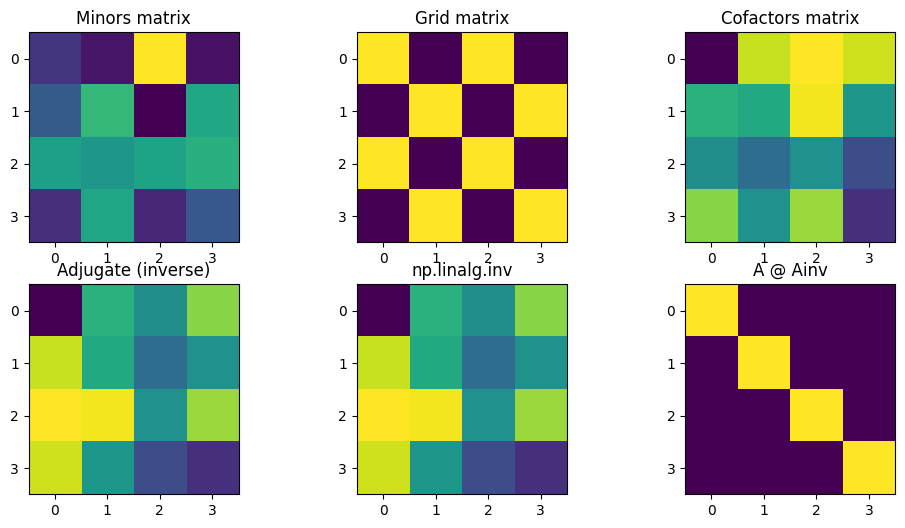

In [8]:
fig, ax = plt.subplots(nrows = 2, ncols= 3, figsize = (12, 6))

# minor matrix 
ax[0][0].imshow(minor_matrix)
ax[0][0].set_title('Minors matrix')

ax[0][1].imshow(grid_matrix)
ax[0][1].set_title('Grid matrix')

ax[0][2].imshow(cofactor_matrix)
ax[0][2].set_title('Cofactors matrix')

ax[1][0].imshow(adjugate_matrix)
ax[1][0].set_title('Adjugate (inverse)')

ax[1][1].imshow(np.linalg.inv(A))
ax[1][1].set_title('np.linalg.inv')

ax[1][2].imshow(A @ np.linalg.inv(A))
ax[1][2].set_title('A @ Ainv')

plt.show()

### One-sided inverses
- Ví dụ với một ma trận cao (số hàng nhiều hơn số cột) tồn tại một ma trận L thỏa mãn $ LT = I$ 
- Ta luôn có vì T là ma trận có rank bằng số hàng (max rank) do đó $ T^TT $ là một full-rank và square
- Luôn tồn tại ma trận nghịch đảo của $T^T T$ khi đó có : $$ (T^TT)^{-1}(T^TT) = I \\ \Leftrightarrow ((T^TT)^{-1}T^T) T = I \\ \Leftrightarrow L T = I $$
- Từ đó, có thể kết luận được rằng : $ L = (T^TT)^{-1}T^T $

In [9]:
T = np.random.randint(-10, 11, size = (40, 4))
L = np.linalg.inv(T.T @ T) @ T.T
 

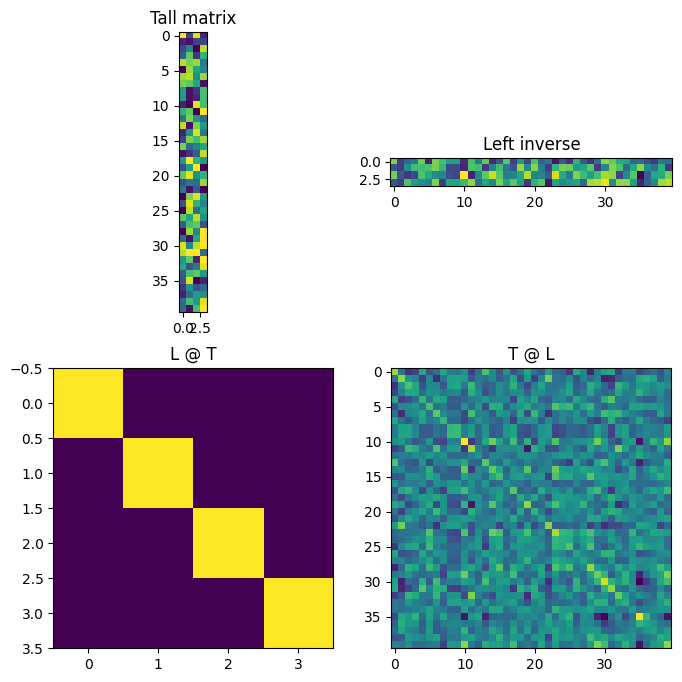

In [10]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 8))

ax[0][0].imshow(T)
ax[0][0].set_title('Tall matrix')

ax[0][1].imshow(L) 
ax[0][1].set_title('Left inverse')

ax[1][0].imshow(L @ T)
ax[1][0].set_title('L @ T')

ax[1][1].imshow(T @ L )
ax[1][1].set_title('T @ L')

plt.show()

## The inverse is unique 
- Ma trận nghịch đảo tồn tại duy nhất. 
- Ta có thể chứng minh phản chứng thông qua việc gọi A là một ma trận khả nghịch (invertible) và B, C là nghịch đảo độc lập của nó. Ta tính như sau : $$ C = CI = CAB  = IB = B  $$ nên do đó B = C 

## Moore - Penrose Pseudoinverse
- Như đề cập ở trên, mọi ma trận đều có Pseudoinverse nó là một ma trận giúp biến đổi ma trận gần bằng hơn với identity matrix
- Với mỗi rank-reduced matrix, nó có vô số pseudoinverses, ta xem xét một pseudoinverse được gọi là Moore-Penrose


In [11]:
A = np.array([[1, 4], [2, 8]])

Apinv = np.linalg.pinv(A)

pi = A @ Apinv 
pi

array([[0.2, 0.4],
       [0.4, 0.8]])

## Numerical Stability of the Inverse
- Tính toán ma trận nghịch đảo liên quan tới các dấu thập phân do tính bởi nhiều determinants có thể dẫn tới sai số
- Khoảng giới hạn giữa giá trị của ma trận có thể ảnh hướng tới sự ổn định của chúng.

In [12]:
N  = 7 
hilbert_matrix = np.zeros((N, N))

for i in range(N) : 
    for j in range(N) : 
        hilbert_matrix[i, j] = 1 / (i + 1 + j)

hilbert_matrix_inv = np.linalg.inv(hilbert_matrix)

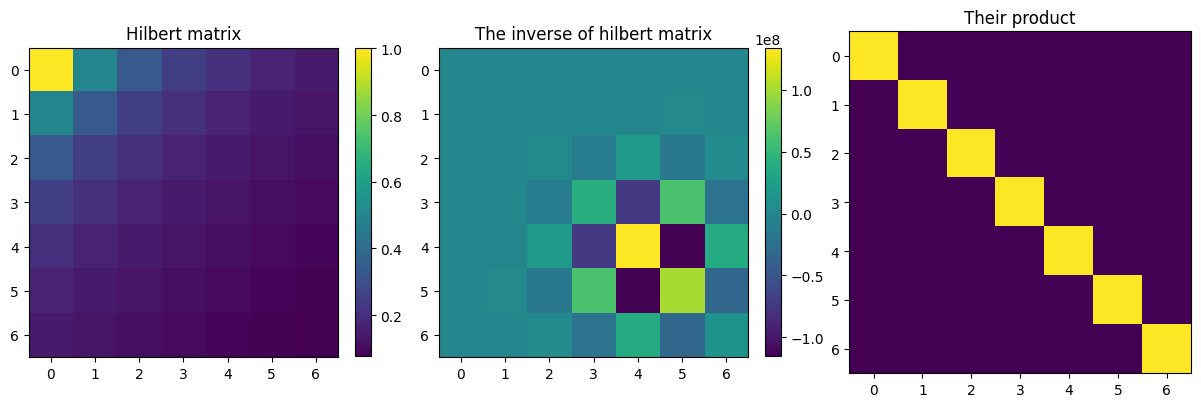

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

h1 = ax[0].imshow(hilbert_matrix, vmin = np.min(hilbert_matrix), vmax = np.max(hilbert_matrix))
ax[0].set_title('Hilbert matrix')
fig.colorbar(h1, ax = ax[0], fraction = .045)

h2 = ax[1].imshow(hilbert_matrix_inv, vmin = np.min(hilbert_matrix_inv), vmax = np.max(hilbert_matrix_inv))

ax[1].set_title('The inverse of hilbert matrix')
fig.colorbar(h2, ax = ax[1], fraction = .045)

ax[2].imshow(hilbert_matrix @ hilbert_matrix_inv)
ax[2].set_title('Their product')

plt.show()

## Geometric Interpretation of Inverse 
- Trong các phần trước, ta đã miêu tả việc nhân ma trận có thể làm thay đổi một ma trận. Ma trận nghịch đảo dùng để đảo ngược lại sự thay đổi này (undo) 

In [14]:
rad = np.linspace(0, 2 * np.pi, 20 )

o_point = np.vstack((np.cos(rad), np.sin(rad)))
T = np.array([
    [0.5, 1], 
    [0,  0.5]
])

trans_point = T @ o_point
inv = np.linalg.inv(T)
trans_inv = inv @ trans_point

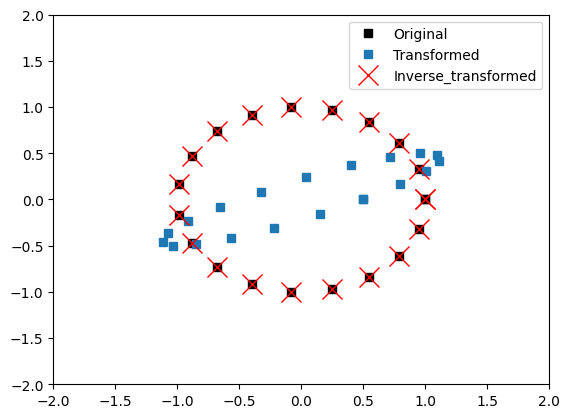

In [15]:
fig, ax = plt.subplots()

ax.plot(o_point[0, :], o_point[1, :], 'ks' ,label = 'Original')

ax.plot(trans_point[0, :], trans_point[1, :],'s', label = 'Transformed' )

ax.plot(trans_inv[0, :], trans_inv[1, :], 'rx', markersize = 15, label = 'Inverse_transformed')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
plt.legend()
plt.show()